In [31]:
import pandas as pd  
import numpy as np
%matplotlib inline

In [61]:
train=pd.read_csv('train55.csv')
test=pd.read_csv('test55.csv')


In [62]:
train.head(10)

,oid,week,fid,totalprice,num_orders
0,1379560,1,1885,136.83,177
1,1466964,1,1993,136.83,270
2,1346989,1,2539,134.86,189
3,1338232,1,2139,339.50,54
4,1448490,1,2631,243.50,40
5,1270037,1,1248,251.23,28
6,1191377,1,1778,183.36,190
7,1499955,1,1062,182.36,391
8,1025244,1,2707,193.06,472
9,1054194,1,1207,325.92,676


In [63]:
test.head()

,oid,week,fid,totalprice
0,1,146,1885,158.11
1,2,146,1993,160.11
2,3,146,2539,157.14
3,4,146,2631,162.02
4,5,146,1248,163.93


In [64]:
train.describe()

,oid,week,fid,totalprice,num_orders
count,5.146000e+03,5146.000000,5146.000000,5146.000000,5146.000000
mean,1.250561e+06,75.188302,1999.927711,326.184880,163.475709
std,1.447933e+05,41.439188,560.483202,155.564072,221.363317
min,1.000024e+06,1.000000,1062.000000,79.540000,13.000000
25%,1.125335e+06,40.000000,1543.000000,191.090000,28.000000
50%,1.251938e+06,76.000000,1971.000000,297.790000,95.000000
75%,1.376042e+06,111.000000,2539.000000,435.590000,229.000000
max,1.499973e+06,145.000000,2956.000000,728.530000,3280.000000


In [65]:
#fulf_cntr_info=pd.read_csv('fulfilment_center_info.csv')
#fulf_cntr_info.head()

In [66]:
#df_with_ctrs=pd.merge(df,fulf_cntr_info,on='center_id')
#test_with_ctrs=pd.merge(test,fulf_cntr_info,on='center_id')
#test_with_ctrs.count()

In [67]:
meal_info=pd.read_csv('meal_info.csv')
meal_info.head()

,fid,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [68]:
train_final=pd.merge(train,meal_info,on='fid')
test_final=pd.merge(test,meal_info,on='fid')
train_final.head()

,oid,week,fid,totalprice,num_orders,category,cuisine
0,1379560,1,1885,136.83,177,Beverages,Thai
1,1018704,2,1885,135.83,323,Beverages,Thai
2,1196273,3,1885,132.92,96,Beverages,Thai
3,1116527,4,1885,135.86,163,Beverages,Thai
4,1343872,5,1885,146.50,215,Beverages,Thai


In [69]:
import pandas_profiling as pp
#pp.ProfileReport(train_final)

In [70]:
#pp.ProfileReport(test_final)

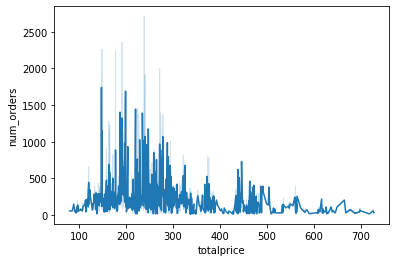

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(train_final['totalprice'],train_final['num_orders'])

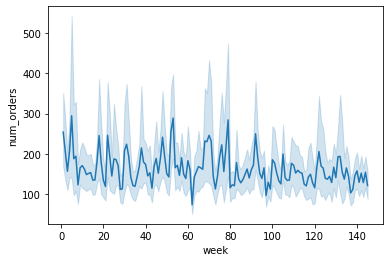

In [72]:
sns.lineplot(train_final['week'],train_final['num_orders'])

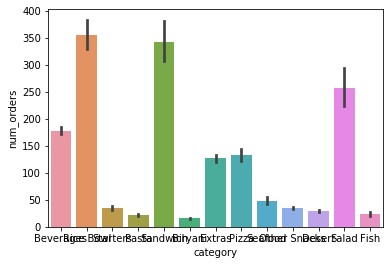

In [73]:
sns.barplot(train_final['category'],train_final['num_orders'])

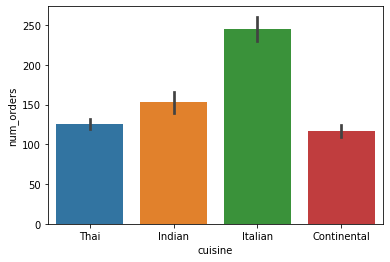

In [74]:
sns.barplot(train_final['cuisine'],train_final['num_orders'])

In [75]:
columns_to_drop=['fid'] #oid
train_final.drop(labels=columns_to_drop,axis=1,inplace=True)
test_final.drop(labels=columns_to_drop,axis=1,inplace=True)
train_final.head()

,oid,week,totalprice,num_orders,category,cuisine
0,1379560,1,136.83,177,Beverages,Thai
1,1018704,2,135.83,323,Beverages,Thai
2,1196273,3,132.92,96,Beverages,Thai
3,1116527,4,135.86,163,Beverages,Thai
4,1343872,5,146.50,215,Beverages,Thai


In [76]:
train_final.dtypes

oid             int64
week            int64
totalprice    float64
num_orders      int64
category       object
cuisine        object
dtype: object

In [77]:
train_final_dummies=pd.get_dummies(train_final)
test_final_dummies=pd.get_dummies(test_final)
test_final_dummies.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,352,353,354,355,356,357,358,359,360,361
oid,1.00,36.00,110.00,148.00,187.00,222.00,258.00,295.00,330.00,2.00,...,272.00,343.00,126.00,164.00,202.00,275.00,311.00,169.00,280.00,348.00
week,146.00,147.00,149.00,150.00,151.00,152.00,153.00,154.00,155.00,146.00,...,153.00,155.00,149.00,150.00,151.00,153.00,154.00,150.00,153.00,155.00
totalprice,158.11,159.11,157.14,159.14,160.11,159.11,159.11,160.11,158.11,160.11,...,582.03,680.03,436.56,291.03,292.03,434.56,435.56,447.23,445.23,445.23
category_Beverages,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
category_Biryani,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
category_Desert,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
category_Extras,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
category_Fish,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
category_Other Snacks,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
category_Pasta,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00


In [78]:
y=train_final_dummies['num_orders']
X=train_final_dummies.drop(['num_orders'],axis=1)
X_test=test_final_dummies
display(X.head())
X_test.head()

,oid,week,totalprice,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,136.83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1018704,2,135.83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1196273,3,132.92,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1116527,4,135.86,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1343872,5,146.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


,oid,week,totalprice,category_Beverages,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1,146,158.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,36,147,159.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,110,149,157.14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,148,150,159.14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,187,151,160.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


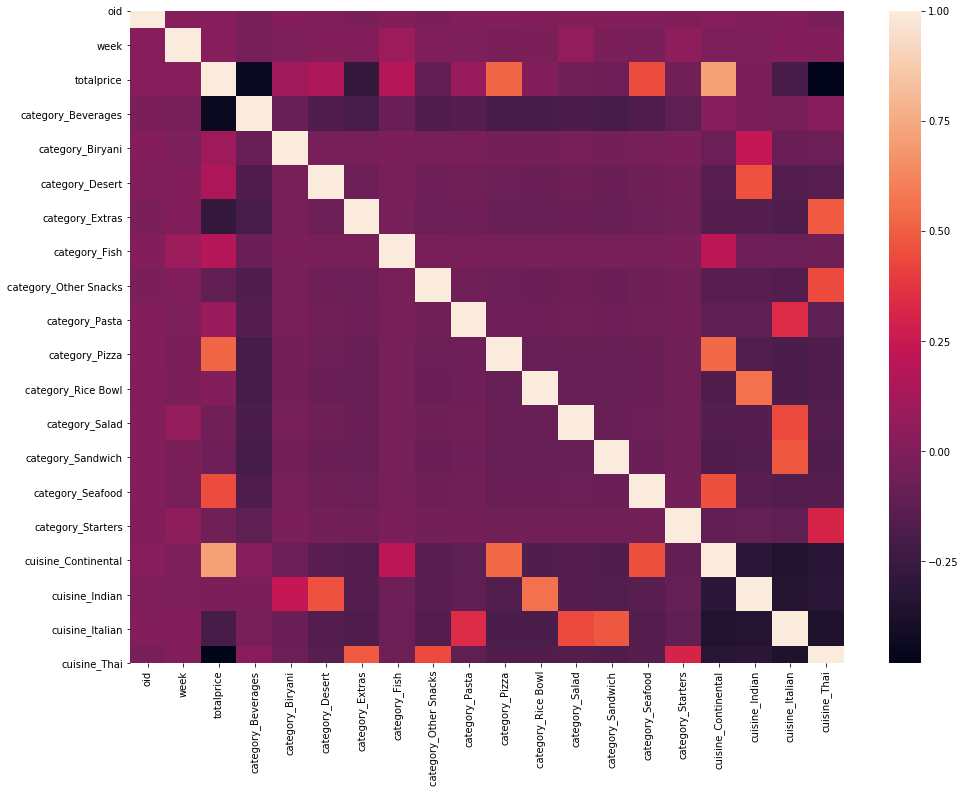

In [79]:
plt.figure(figsize=(16, 12))

sns.heatmap(X.corr())

In [80]:
Pred_id=X_test.oid
columns_to_drop=['oid']
#X.drop(['totalprice'],axis=1,inplace=True)
#X_test.drop(['totalprice'],axis=1,inplace=True)

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_jobs=-1,n_estimators=500,oob_score=True)

In [82]:
rf.fit(X.values,np.array(y))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [83]:
#imppppppppppppppp
features = pd.DataFrame()
features['Feature'] = X_test.columns
features['Importance'] = rf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)
feature_list = list(features.columns)
features

,Importance
Feature,
totalprice,0.425166
week,0.147305
oid,0.095804
category_Rice Bowl,0.074453
category_Sandwich,0.067849
cuisine_Italian,0.053127
category_Salad,0.042048
category_Beverages,0.030743
category_Pasta,0.021744


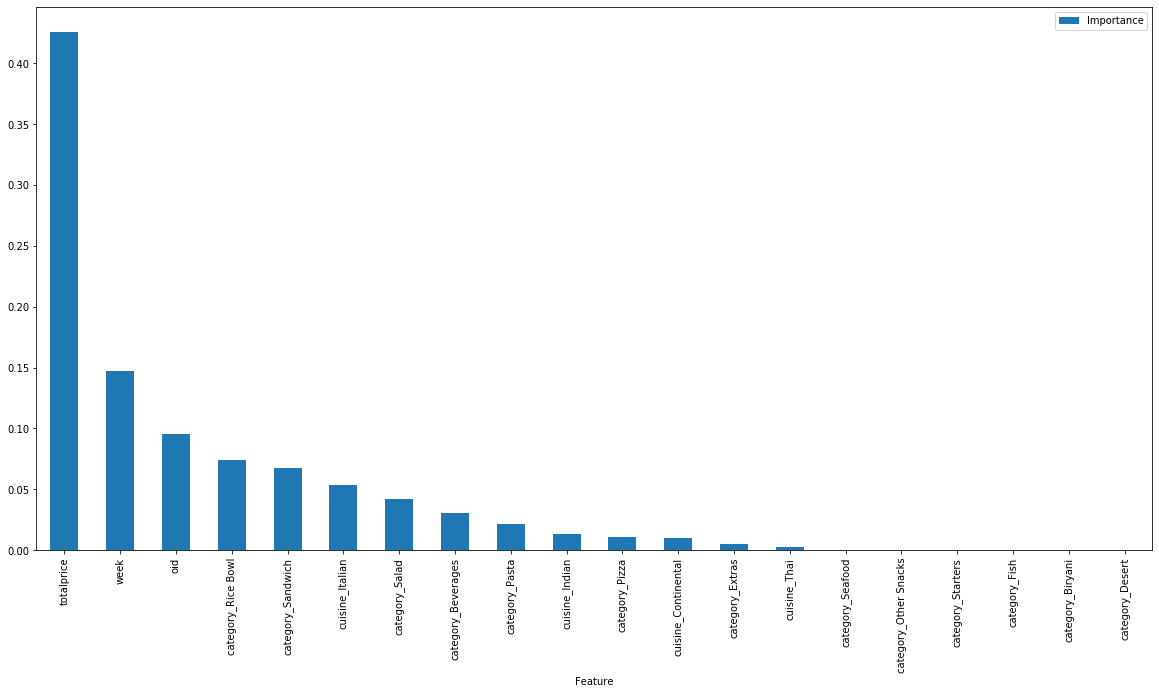

In [84]:
#Creating a bar plot
features.plot(kind='bar', figsize=(20, 10))

In [85]:
y_preds=rf.predict(X_test.values)
np.sum(y_preds<0)

0

In [86]:
#submission=pd.read_csv("sample_submission_hSlSoT6.csv")
#submission = pd.DataFrame({'oid':test_final['oid'],'fid':test_final['fid'],'week':test_final['week'],'num_orders':y_preds})
submission = pd.DataFrame({'oid':test_final['oid'],'week':test_final['week'],'num_orders':y_preds})
submission['oid']=Pred_id
submission['num_orders']=y_preds
submission = pd.DataFrame(submission, columns=['oid','week','num_orders'])
submission.head(25)

#,'fid','week'

,oid,week,num_orders
0,1,146,116.178
1,36,147,102.234
2,110,149,119.738
3,148,150,102.858
4,187,151,104.686
5,222,152,102.234
6,258,153,102.234
7,295,154,104.686
8,330,155,116.178
9,2,146,104.686


In [87]:
submission.to_csv('Result.csv', index=False)
print(submission.to_string())

     oid  week  num_orders
0      1   146     116.178
1     36   147     102.234
2    110   149     119.738
3    148   150     102.858
4    187   151     104.686
5    222   152     102.234
6    258   153     102.234
7    295   154     104.686
8    330   155     116.178
9      2   146     104.686
10    37   147     119.668
11    74   148     117.272
12   111   149     116.178
13   149   150     116.178
14   188   151     117.272
15   223   152     116.300
16   259   153     102.234
17   296   154     119.738
18   331   155     116.300
19     3   146     119.738
20    38   147     119.738
21    75   148     116.178
22     4   146      58.694
23    39   147      76.406
24    76   148      70.684
25   190   151      70.684
26   225   152      70.684
27   261   153      63.338
28   297   154      58.694
29   332   155      62.130
30     5   146      62.494
31    40   147      83.494
32    77   148      82.244
33   113   149      82.244
34   151   150      72.268
35   191   151      71.566
3